In [3]:
# Linear Regression Assignment

In [1]:
import pandas as pd
import numpy as np

In [2]:
#1. Consider the Boston Housing Price Dataset.

df = pd.read_csv("../data/boston_house_price.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [4]:
'''
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000
'''

'\nCRIM: Per capita crime rate by town\nZN: Proportion of residential land zoned for lots over 25,000 sq. ft\nINDUS: Proportion of non-retail business acres per town\nCHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX: Nitric oxide concentration (parts per 10 million)\nRM: Average number of rooms per dwelling\nAGE: Proportion of owner-occupied units built prior to 1940\nDIS: Weighted distances to five Boston employment centers\nRAD: Index of accessibility to radial highways\nTAX: Full-value property tax rate per $10,000\nPTRATIO: Pupil-teacher ratio by town\nB: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town\nLSTAT: Percentage of lower status of the population\nMEDV: Median value of owner-occupied homes in $1000\n'

In [5]:
# 2. Find the correlation of features using a heatmap.

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

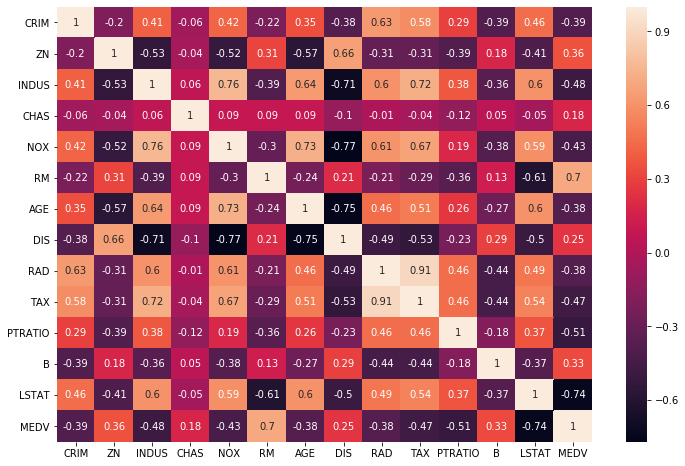

In [7]:
plt.figure(figsize=(12,8))

correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
'''
Observations:
- The correlation coefficients range from -1 to +1.
- The values close to +1 have strong positive correlation, while the values close to -1 have strong negative correlation.
- Feature of interest are those which have high correlation with the target variable, MEDV
- By looking at the above graph, we observe that, RM has high positive correlation, and PTRATIO and LSTAT have high negative
  correlation
'''

'\nObservations:\n- The correlation coefficients range from -1 to +1.\n- The values close to +1 have strong positive correlation, while the values close to -1 have strong negative correlation.\n- Feature of interest are those which have high correlation with the target variable, MEDV\n- By looking at the above graph, we observe that, RM has high positive correlation, and PTRATIO and LSTAT have high negative\n  correlation\n'

In [37]:
# 3. Perform hypothesis testing

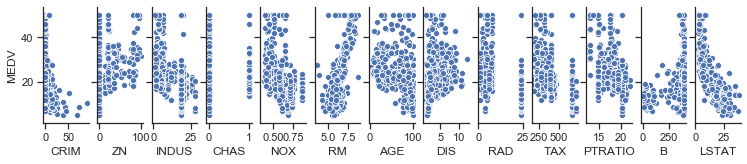

In [150]:
x_vars = df.columns[:-1]
y_vars = ['MEDV']

g = sns.pairplot(data=df, x_vars=x_vars, y_vars=y_vars)

g.fig.set_figwidth(10)

    
plt.show()

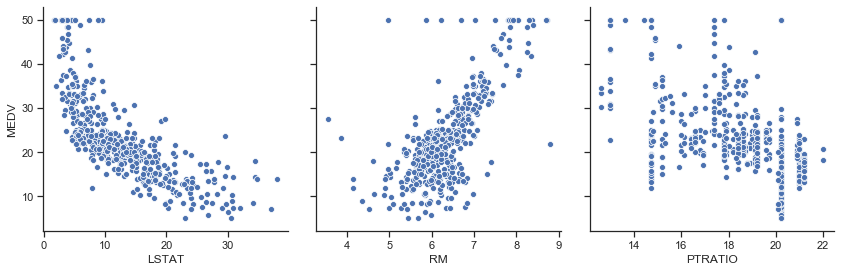

In [164]:

sns.pairplot(df, height= 4, x_vars=['LSTAT', 'RM', 'PTRATIO'], y_vars=['MEDV'] )

plt.show()

In [9]:
# 4.Linear Regression using statsmodel

In [165]:


import statsmodels.formula.api as sm

#based on the above correlation matrix, the interest of feature is selected as RM, and LSTAT
boston_model = sm.ols(formula='MEDV ~ RM + LSTAT + PTRATIO', data=df).fit()



In [166]:
# the value for model parameters
boston_model.params

Intercept    18.567112
RM            4.515421
LSTAT        -0.571806
PTRATIO      -0.930723
dtype: float64

In [167]:
boston_model.pvalues # as you can see the pvalues are very small, hence parameter are significant

Intercept    2.725808e-06
RM           7.734793e-24
LSTAT        7.944208e-36
PTRATIO      1.644660e-14
dtype: float64

In [168]:
# model efficiency
boston_model.rsquared 

0.6786241601613111

In [14]:
'''
The r-squared or coefficient of determination tells us that 67% of the total variance in the price(MEDV) can be explained
by the linear regression model.
'''

'\nThe r-squared or coefficient of determination tells us that 67% of the total variance in the price(MEDV) can be explained\nby the linear regression model.\n'

In [169]:
boston_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          2.69e-123
Time:                        23:31:20   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.000      10.879      26.255
RM             4.5154      0.426     10.603      0.000       3.679       5.352
LSTAT         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
PTRATIO       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
Null Hypothesis = the slope is zero
Alternate Hypothesis = the slope is not zero

If there is a significant linear relationship between the independent and dependent variable, the slope will not be zero.

This is two tailed hypothesis test.

As observed from above, the p-value for all the independent variables is small(approximately zero), 
hence the null hypothesis cannot be accepted.

'''

In [17]:
# 5.Using scikit-learn, verify atleast 2 assumptions in Linear Regression.


In [18]:
# Assumptions
# Linear Relationship between the features and target:
# Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.

'''
To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values.
The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot
or around a horizontal line in the latter one. 
'''

'\nTo detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values.\nThe desired outcome is that points are symmetrically distributed around a diagonal line in the former plot\nor around a horizontal line in the latter one. \n'

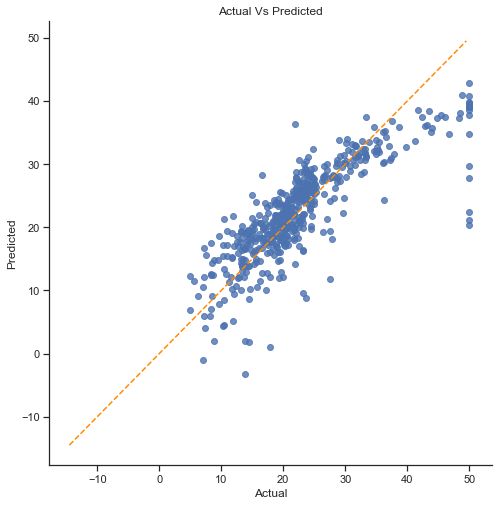

In [170]:
predictions = boston_model.predict()
resids = boston_model.resid

df_results  = pd.DataFrame({'RM':df['RM'], 'PTRATIO':df['PTRATIO'],'LSTAT':df['LSTAT'],
                            'Actual': df['MEDV'], 'Predicted' : predictions})

# calcuating the residuals
df_results['Residuals'] = resids

# Plotting the actual vs predicted values
sns.lmplot(x = 'Actual', y = 'Predicted', data=df_results, fit_reg=False, height=7)

#Plotting the diagonal line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')

plt.title('Actual Vs Predicted')

plt.show()


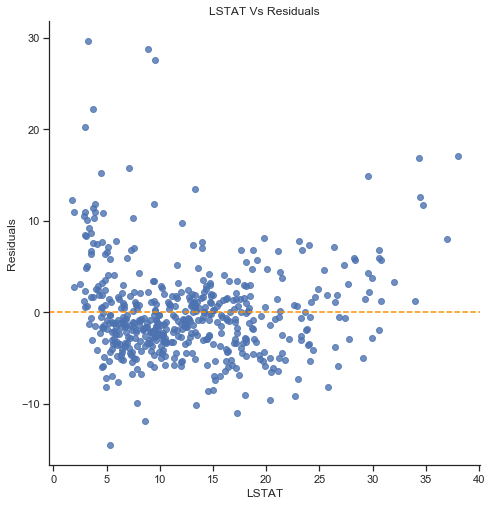

In [172]:
graph = sns.lmplot(x = 'LSTAT', y = 'Residuals', data=df_results, fit_reg=False, height=7)

plt.axhline(y=0, color='darkorange', linestyle='--')

plt.title('LSTAT Vs Residuals')

plt.show()

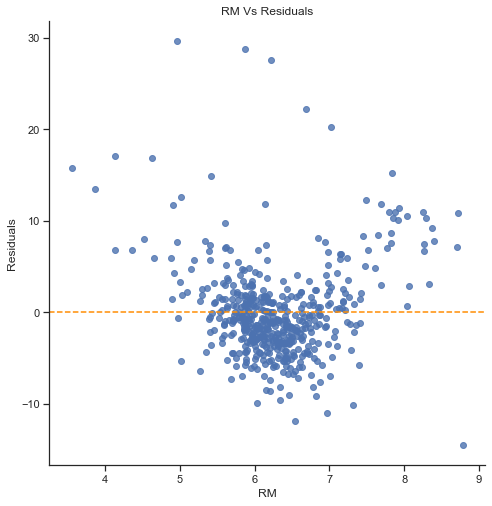

In [173]:
graph = sns.lmplot(x = 'RM', y = 'Residuals', data=df_results, fit_reg=False, height=7)

plt.axhline(y=0, color='darkorange', linestyle='--')

plt.title('RM Vs Residuals')

plt.show()

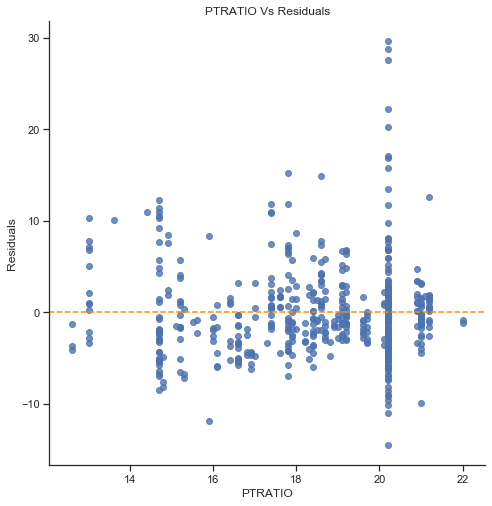

In [174]:
graph = sns.lmplot(x = 'PTRATIO', y = 'Residuals', data=df_results, fit_reg=False, height=7)

plt.axhline(y=0, color='darkorange', linestyle='--')

plt.title('PTRATIO Vs Residuals')

plt.show()

In [23]:
# No (perfect) multicollinearity
'''
 the features should be linearly independent. What does that mean in practice? 
 We should not be able to use a linear model to accurately predict one feature using another one. 
 Let’s take X1 and X2 as examples of features. 
 It could happen that X1 = 2 + 3 * X2, which violates the assumption
 
 we will use a heatmap of the correlation as a visual aid and examine the variance inflation factor (VIF).
 
 A rule of thumb for removal could be VIF larger than 10 (5 is also common)
'''

'\n the features should be linearly independent. What does that mean in practice? \n We should not be able to use a linear model to accurately predict one feature using another one. \n Let’s take X1 and X2 as examples of features. \n It could happen that X1 = 2 + 3 * X2, which violates the assumption\n \n we will use a heatmap of the correlation as a visual aid and examine the variance inflation factor (VIF).\n \n A rule of thumb for removal could be VIF larger than 10 (5 is also common)\n'

In [175]:
# VIF for RM
model_vif_rm = sm.ols(formula='RM ~ LSTAT + PTRATIO', data=df).fit()
rsquared = model_vif_rm.rsquared
vif_rm = 1/(1 - rsquared)
vif_rm

1.6534193320635664

In [176]:
# VIF for LSTAT
model_vif_lstat = sm.ols(formula='LSTAT ~ RM + PTRATIO', data=df).fit()
rsquared = model_vif_lstat.rsquared
vif_lstat = 1/(1 - rsquared)
vif_lstat

1.6794249444679825

In [177]:
# VIF for PTRATIO
model_vif_ptratio = sm.ols(formula='PTRATIO ~ RM + LSTAT', data=df).fit()
rsquared = model_vif_ptratio.rsquared
vif_ptratio = 1/(1 - rsquared)
vif_ptratio

1.1981014359252606

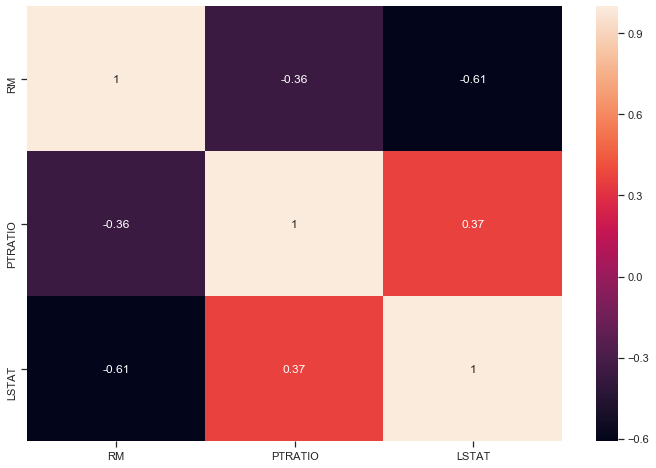

In [178]:
#correlation matrix

plt.figure(figsize=(12,8))

df_heatmap =df_results.drop(['Residuals', 'Predicted', 'Actual'], axis=1)

correlation_matrix = df_heatmap.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)



In [28]:
# Homoscedasticity of error terms
'''
Homoscedasticity describes a situation in which the error term (
that is, the “noise” or random disturbance in the relationship between the features and the target) 
is the same across all values of the independent variables.

To investigate if the residuals are homoscedastic, 
we can look at a plot of residuals (or standardized residuals) vs. predicted (fitted) values. 
'''

'\nHomoscedasticity describes a situation in which the error term (\nthat is, the “noise” or random disturbance in the relationship between the features and the target) \nis the same across all values of the independent variables.\n\nTo investigate if the residuals are homoscedastic, \nwe can look at a plot of residuals (or standardized residuals) vs. predicted (fitted) values. \n'

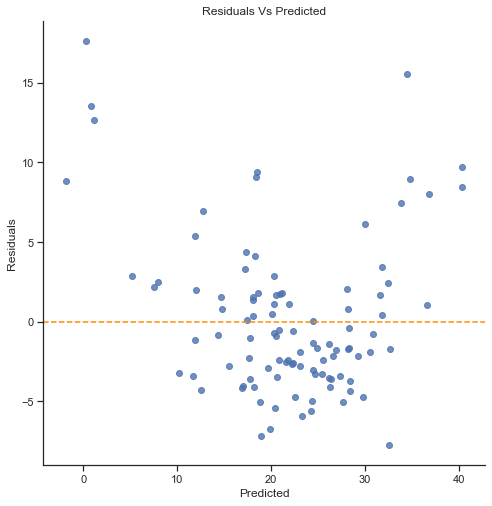

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

boston = df[['RM', 'LSTAT', 'PTRATIO', 'MEDV']].copy()

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], 
                  columns = ['LSTAT','RM', 'PTRATIO'])

Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)

predictions = linearRegression.predict(X_test)

residuals = Y_test - predictions

boston_results  = pd.DataFrame({'Actual': Y_test, 'Predicted' : predictions, 'Residuals': residuals})

# Plotting the actual vs predicted values
sns.lmplot(x = 'Predicted', y = 'Residuals', data=boston_results, fit_reg=False, height=7)

plt.axhline(y=0, color='darkorange', linestyle='--')

plt.title('Residuals Vs Predicted')

plt.show()



In [31]:
# 6. Also, use Lasso and Ridge Regression and compare the 3 regressions. 
# The better way for comparison is by plotting graphs of three.

In [181]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 0.1, random_state = 0)
rr.fit(X_train, Y_train)

rr_predict = rr.predict(X_test)

# mean square error
rr_mse = np.mean((rr_predict - Y_test) ** 2)
print("Ridge Regression: Mean Square Error: ",rr_mse)

# accuracy
rr_score = rr.score(X_test, Y_test)
print("Ridge Regression: Accuracy: ",rr_score)



Ridge Regression: Mean Square Error:  24.15201709209691
Ridge Regression: Accuracy:  0.6915209646453871


In [182]:
from sklearn.linear_model import Lasso

ll = Lasso(alpha=0.1, random_state = 0)
ll.fit(X_train, Y_train)

ll_predict = rr.predict(X_test)

# mean square error
ll_mse = np.mean((ll_predict - Y_test) ** 2)
print("Lasso Regression: Mean Square Error: ",ll_mse)

# accuracy
ll_score = ll.score(X_test, Y_test)
print("Lasso Regression: Accuracy: ",ll_score)

Lasso Regression: Mean Square Error:  24.15201709209691
Lasso Regression: Accuracy:  0.6853968817236605


In [183]:
# simple linear regression

clf = LinearRegression()
clf.fit(X_train, Y_train)
clf_predict = clf.predict(X_test)

# mean square error
clf_mse = np.mean((clf_predict - Y_test) ** 2)
print("Simple Linear Regression: Mean Square Error: ",clf_mse)

# accuracy
clf_score = clf.score(X_test, Y_test)
print("Simple Linear Regression: Accuracy: ",clf_score)

Simple Linear Regression: Mean Square Error:  24.14678209556331
Simple Linear Regression: Accuracy:  0.6915878280744172


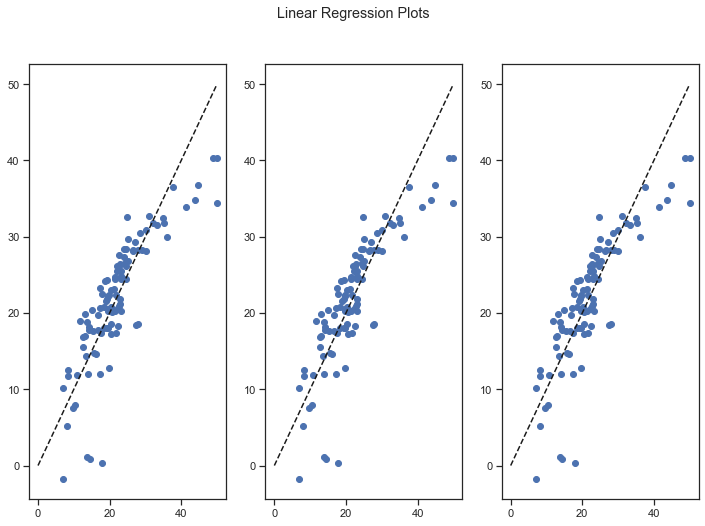

In [184]:


fig, axs = plt.subplots(1, 3, figsize=(12, 8))

axs[0].scatter(Y_test, clf_predict)
axs[0].plot([0, 50], [0, 50], '--k')
axs[0].axis('tight')

axs[1].scatter(Y_test, ll_predict)
axs[1].plot([0, 50], [0, 50], '--k')
axs[1].axis('tight')


axs[2].scatter(Y_test, rr_predict)
axs[2].plot([0, 50], [0, 50], '--k')
axs[2].axis('tight')


fig.suptitle('Linear Regression Plots')
plt.show()